# Problem 1 - Gradient and Hessian of Multivariate Scalar Function
From appendix `A.7 Exercises` page 65 in `Numerical Methods for Constrained Optimization`

Consider the function $f: \mathbb{R}^2 \mapsto \mathbb{R}$ defined by
$$
f(x)=x_1^2-2 x_1+3 x_1 x_2+4 x_2^3
$$

In [1]:
def f(x):
    return x[0]**2 - 2*x[0] + 2*x[0]*x[1] + 4*x[1]**3

## 1 - Contour Plot and Approx Minima Location

/home/william/Documents/DTUCourses/copti/src/copti/plot/contour.py:25: UserWarning: The following kwargs were not used by contour: 'color_map'
  CS = ax.contour(X1, X2, Z, color_map=cmap)


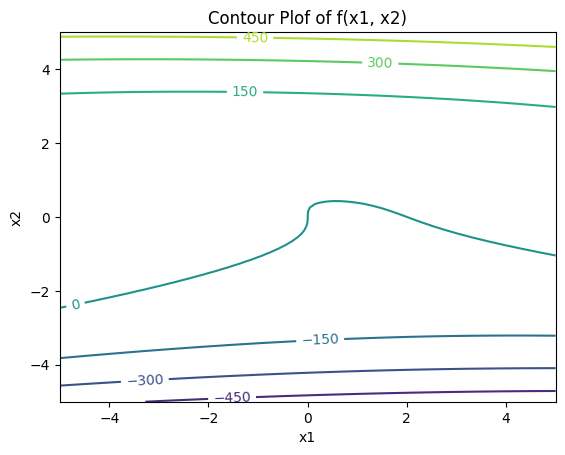

In [2]:
import numpy as np
from copti.plot.contour import plot_2d

x1 = np.linspace(-5, 5, 100)
x2 = np.linspace(-5, 5, 100)

plot_2d(f, x1, x2, save_path=None, show=True)

We see the 0-curve for the local minima

## 2 - Analytical Expression for the Gradient $\nabla f(x)$

$f(x)=x_1^2-2 x_1+3 x_1 x_2+4 x_2^3$

$$
\nabla f(x) = 
\begin{bmatrix}
    2x_1 - 2 + 3x_2 \\
    3x_1 + 12x_2^2
\end{bmatrix}
=
\begin{bmatrix}
    2x_1 + 3x_2 - 2 \\
    3x_1 + 12x_2^2
\end{bmatrix}
$$

## 3 - Analytical Expression for the Hessian $\nabla^2 f(x)$

$$
\nabla^2 f(x) = 
\begin{bmatrix}
    2 & 3 \\
    3 & 24x_2
\end{bmatrix}
$$

## 4 - Function for Computing $f, \nabla f, \nabla^2 f$
Implemented in `src/copti/calculus/multivar.py`

## 5 - Finite Difference Approximation
Verifying results

In [3]:
from copti.calculus.multivar import f_grad_hess

x0 = np.array([2., 3.])

f, grad, hess = f_grad_hess(f, x0)

In [4]:
grad

array([  8., 112.])

In [5]:
hess

array([[ 2.,  2.],
       [ 2., 72.]])

# Problem 2 - Rosenbrock Function

We define the function

In [6]:
"""Rosenbrock function"""
def f(x, p):
    return p[0]*(x[1] - x[0]**2)**2 + p[1]*(1-x[0])**2

## 1 - Contour Plot and Minima

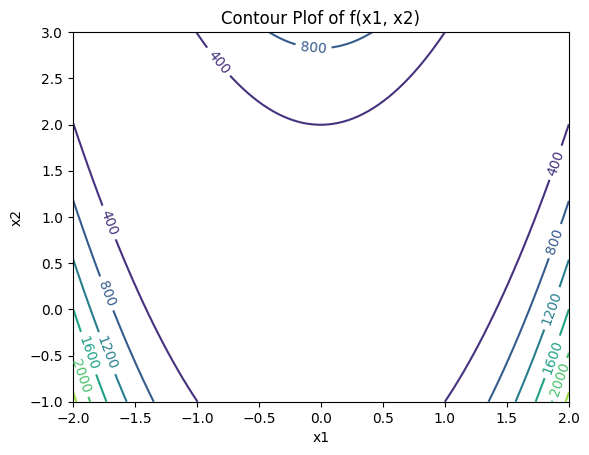

In [7]:
import numpy as np
from copti.plot.contour import plot_2d

p = np.array([100., 1.])
fx = lambda x: f(x, p)

x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-1, 3, 100)

plot_2d(fx, x1, x2, save_path=None, show=True)

We see the minima in the 'V' shape between the two '400' contours.

## 2 - Analytical Expression for the Gradient $\nabla f(x)$

Chain rule
$$
\frac{\partial}{\partial x} f(g(x))=\frac{\partial f(g(x))}{\partial x} \frac{d g}{\partial x}
$$

Gradient
$$
\begin{array}{l}
\nabla f(x)=\left[\begin{array}{c}
2 p_1\left(x_2-x_1^2\right)\left(-2 x_1\right)+2 p_2\left(1-x_1\right)(-1) \\
2 p_1\left(x_2-x_1^2\right)
\end{array}\right] \\
=\left[\begin{array}{c}
-4 p_1 x_1\left(x_2-x_1^2\right)-2 p_2\left(1-x_1\right) \\
2 p_1\left(x_2-x_1^2\right)
\end{array}\right]
\end{array}
$$

In [8]:
import numpy as np

def rosenbrock_grad(x,p):
    return np.array([-4*p[0]*x[0]*(x[1] - x[0]**2) - 2*p[1]*(1-x[0]),
              2*p[0]*(x[1] - x[0]**2)])

## 3 - Analytical Expression for the Hessian $\nabla^2 f(x)$

$\begin{array}{l}\nabla^2 f(x) =\left[\begin{array}{cc}-4 p_1 x_2+12 p_1 x_1^2+2 p_1 & -4 p_1 x_1 \\ -4 p_1 x_1 & \\ & 2 p_1\end{array}\right]\end{array}$

In [9]:
import numpy as np

def rosenbrock_hess(x, p):
    return np.array([[-4*p[0]*x[1] + 12*p[0]*x[0]**2+2*p[1], -4*p[0]*x[0]], 
              [-4*p[0]*x[0], 2*p[0]]])

## 4 - Implement Rosenbrock f, df, d2f

In [10]:
from copti.calculus.multivar import f_grad_hess

x0 = np.array([1., 2.])

f, grad, hess = f_grad_hess(fx, x0)

In [11]:
grad

array([-400.,  200.])

In [12]:
rosenbrock_grad(x0, p)

array([-400.,  200.])

In [13]:
hess

array([[ 402., -400.],
       [-400.,  200.]])

In [14]:
rosenbrock_hess(x0, p)

array([[ 402., -400.],
       [-400.,  200.]])

# Problem 3 - Derivatives of Multivariate Vector Function

We consider the function $c: \mathbb{R}^2 \mapsto \mathbb{R}^2$ defined by
$$
c(x)=\left[\begin{array}{l}
c_1(x) \\
c_2(x)
\end{array}\right]=\left[\begin{array}{l}
c_1\left(x_1, x_2\right) \\
c_2\left(x_1, x_2\right)
\end{array}\right]=\left[\begin{array}{l}
e^{x_1}-x_2 \\
x_1^2-2 x_2
\end{array}\right]
$$

## 1 - Analytical Expression for Gradient $\nabla c(x)$

$$
\nabla c(x) =
\begin{bmatrix}
e^{x_1} & -1 \\
2x_1 & -2
\end{bmatrix}
$$

## 2 - Analytical Expression for Jacobian $J(x)=c_x(x)=\frac{\partial c}{\partial x}(x)$

$$
J(x) =
\nabla c(x) =
\begin{bmatrix}
e^{x_1} & -1 \\
2x_1 & -2
\end{bmatrix}
$$

## 3 - Compute c, dc, d2c

In [6]:
import sympy as sp
import numpy as np
from copti.calculus.vec_multivar import f_jac, f_hess

x1, x2 = sp.symbols('x1 x2')
c = sp.Matrix([sp.exp(x1) - x2, x1**2 -2*x2])
x0 = np.array([1.7, 2.1])

f, jac = f_jac(c, (x1, x2), x0)
f, hess = f_hess(c, (x1, x2), x0)

print(jac)
print(hess)

[[ 5.47394739 -1.        ]
 [ 3.4        -2.        ]]
[[[5.47394739 0.        ]
  [0.         0.        ]]

 [[2.         0.        ]
  [0.         0.        ]]]
